# Exercício 1

In [30]:
import random

seed = 1000

In [31]:
def bit_pattern(size):
    string = ""
    for i in range(size):
        string = string + str(random.randint(0, 1))
    return string

In [32]:
print(bit_pattern(8))

00110101


# Exercício 2

In [35]:
import time

In [36]:
def guess_pattern(pattern):
    pattern_size = len(pattern)
    guess = bit_pattern(pattern_size)
    tries = 0
    while guess != pattern:
        guess = bit_pattern(pattern_size)
        tries = tries + 1
    return tries

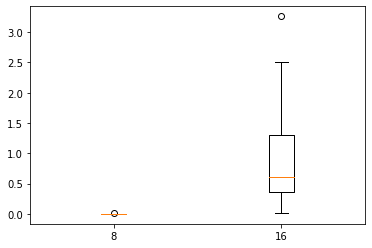

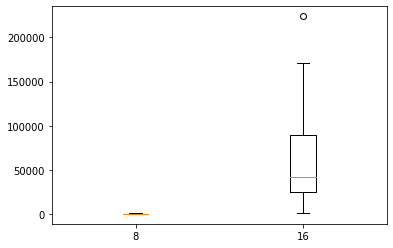

In [41]:
runtimes = []
attempts = []
sizes = [8,16]
random.seed(seed)
for size in sizes:
    trials = []
    tries = []
    for i in range(30):
        start_time = time.time()
        run = guess_pattern(bit_pattern(size))
        end_time = time.time() - start_time
        tries.append(run)
        trials.append(end_time)
    runtimes.append(trials)
    attempts.append(tries)

import matplotlib.pyplot as plt

plt.boxplot(runtimes)
plt.xticks([i+1 for i in range(len(sizes))], sizes)
plt.show()

plt.boxplot(attempts)
plt.xticks([i+1 for i in range(len(sizes))], sizes)
plt.show()


Nota: No jupyter não consegui testar com 32 bits, fica indefinitivamente a correr

# Exercício 3

Esta função vê a percentagem de bits corretos do pattern aleatório face ao pattern correto. Pode ser usada para selecionar os melhores e depois aumentar a proximidade com uma mutation rate ou crossover.

In [45]:
def evaluate_pattern(guess, pattern):
    pattern_size = len(pattern)
    percentage = 100 / pattern_size
    proximity = 0

    for i in range(pattern_size):
        if guess[i] == pattern[i]:
            proximity = proximity + percentage

    return proximity

# Exercício 4

Índices pares devem ser 0 e índices ímpares devem ser 1

In [104]:
#01010101 - maximo para 8 bits
def evaluate_pattern_2(guess,pattern):
    pattern_size = len(pattern)
    percentage = 100 / pattern_size
    proximity = 0
    for i in range(len(guess)):
        if i%2 == 0:
            if guess[i] == '0':
                proximity = proximity + percentage   
        else:
            
            if guess[i] == '1':
                proximity = proximity + percentage
    return proximity

In [103]:
print(evaluate_pattern_2('01010101','01010101'))

100.0


# Exercício 5

In [63]:
def mutate(guess, pattern):
    initial_pattern = guess
    proximity = evaluate_pattern(guess, pattern)
    mutations = 0
    while proximity < 100 and mutations != 1000:
        mutation = list(guess)
        bit_to_flip = random.randint(0, len(mutation) - 1)
        if mutation[bit_to_flip] == "1":
            mutation[bit_to_flip] = "0"
        else:
            mutation[bit_to_flip] = "1"
        mutation_proximity = evaluate_pattern(mutation, pattern)

        if mutation_proximity > proximity:
            proximity = mutation_proximity
            guess = "".join(mutation)

        mutations = mutations + 1
    return initial_pattern, guess, pattern, proximity, mutations

In [51]:
pattern_size = 32
random.seed(seed)
result = mutate(bit_pattern(pattern_size), bit_pattern(pattern_size))
print('Pattern inicial gerado: ', result[0],'\nPattern mutado vs pretendido: ',result[1],'-',result[2], '\nProximidade maxima: ',result[3],'Mutacoes ocorridas: ',result[4])

Pattern inicial gerado:  10110101000110101001011001000101 
Pattern mutado vs pretendido:  00101100111001101111111100010010 - 00101100111001101111111100010010 
Proximidade maxima:  100.0 Mutacoes ocorridas:  110


In [53]:
pattern_size = 64
random.seed(seed)
result = mutate(bit_pattern(pattern_size), bit_pattern(pattern_size))
print('Pattern inicial gerado: ', result[0],'\nPattern mutado vs pretendido: ',result[1],'-',result[2], '\nProximidade maxima: ',result[3],'Mutacoes ocorridas: ',result[4])

Pattern inicial gerado:  1011010100011010100101100100010100101100111001101111111100010010 
Pattern mutado vs pretendido:  1000111110100011110001111101000001000001010000010011001000010101 - 1000111110100011110001111101000001000001010000010011001000010101 
Proximidade maxima:  100.0 Mutacoes ocorridas:  227


In [61]:
pattern_size = 128
random.seed(seed)
result = mutate(bit_pattern(pattern_size), bit_pattern(pattern_size))
print('Pattern inicial gerado: ', result[0],'\nPattern mutado vs pretendido: ',result[1],'-',result[2], '\nProximidade maxima: ',result[3],'Mutacoes ocorridas: ',result[4])

Pattern inicial gerado:  10110101000110101001011001000101001011001110011011111111000100101000111110100011110001111101000001000001010000010011001000010101 
Pattern mutado vs pretendido:  10010101100101010100000110011001011111100011101011010110100011000110100101111101111000001000010111001110000011101100100101010110 - 10010101100101010100000110011001011111100011101011010110100011000110100101111101111000001000010111001110000011101100100101010110 
Proximidade maxima:  100.0 Mutacoes ocorridas:  699


In [64]:
pattern_size = 256
random.seed(seed)
result = mutate(bit_pattern(pattern_size), bit_pattern(pattern_size))
print('Pattern inicial gerado: ', result[0],'\nPattern mutado vs pretendido: ',result[1],'-',result[2], '\nProximidade maxima: ',result[3],'Mutacoes ocorridas: ',result[4])

Pattern inicial gerado:  1011010100011010100101100100010100101100111001101111111100010010100011111010001111000111110100000100000101000001001100100001010110010101100101010100000110011001011111100011101011010110100011000110100101111101111000001000010111001110000011101100100101010110 
Pattern mutado vs pretendido:  0100111011001100001101100111101000100111001010100010101001110101101101011100101010110100100100001100110000100101011101100101111101000000100110111000000111001010111011101000001011001001001110010111101101011010000111001011001111101000011100010001000010110110 - 0100111011001100001101100111101000100111001010100010101001110101101101011100101010110100100100001100110000100101011101100101111101000000100110111000000111001010111011101000000011001001001110010111101101011010000111001011001111101000011100010001000010110110 
Proximidade maxima:  99.609375 Mutacoes ocorridas:  1000


Pattern mutado vs pretendido:  



(...)0100000<b>1</b>011(...)

(...)0100000<b>0</b>011(...)

# Exercício 6

In [66]:
def mutate(pattern_to_mutate):
    mutation = list(pattern_to_mutate)
    bit_to_flip = random.randint(0, len(mutation) - 1)
    if mutation[bit_to_flip] == "1":
        mutation[bit_to_flip] = "0"
    else:
        mutation[bit_to_flip] = "1"
    mutated = "".join(mutation)

    return mutated


def generate_population(pattern_size, population_size):
    pattern_lst = []
    for i in range(population_size):
        pattern_lst.append(bit_pattern(pattern_size))
    return pattern_lst


def get_best_population(pattern_lst, guess, pattern_size, population_size):
    proximity_lst = []

    for i in range(len(pattern_lst)):
        proximity_lst.append(evaluate_pattern(guess, pattern_lst[i]))

    best_population = []
    current_proximity = 100
    possible_proximity = 100 / pattern_size
    while len(best_population) < population_size * 0.3:
        for i in range(len(proximity_lst)):
            if proximity_lst[i] == current_proximity:
                best_population.append(pattern_lst[i])
        if current_proximity == 0:
            break
        else:
            current_proximity = current_proximity - possible_proximity

    best_individual = pattern_lst[proximity_lst.index(max(proximity_lst))]
    return best_population, int(max(proximity_lst)), best_individual


def search(pattern_size, guess, population_size):
    pattern_lst = generate_population(pattern_size, population_size)
    best_population = get_best_population(pattern_lst, guess, pattern_size, population_size)
    best_population_lst = best_population[0]
    max_proximity = best_population[1]
    best_individual = best_population[2]
    stagnate = 0
    iterations = 0
    while stagnate != 20000:
        new_population = []
        while len(new_population) < 100:
            pattern_to_mutate_idx = random.randint(0, len(best_population_lst) - 1)
            new_population.append(mutate(best_population_lst[pattern_to_mutate_idx]))
        best_population = get_best_population(new_population, guess, pattern_size, len(new_population))
        best_population_lst = best_population[0]
        if guess == best_population[2]:
            print('Pattern Encontrado')
            break
        elif max_proximity <= best_population[1]:
            stagnate = stagnate + 1
        else:
            max_proximity = best_population[1]
            best_individual = best_population[2]
            stagnate = 0
        iterations = iterations + 1
    return best_population[2], guess, iterations

In [70]:
random.seed(seed)
bits=32
results = search(bits, bit_pattern(bits), 100)
print('Melhor individuo:', results[0], '\nPattern pretendido:', results[1],'\nIteracoes:',results[2])

Pattern Encontrado
Melhor individuo: 10110101000110101001011001000101 
Pattern pretendido: 10110101000110101001011001000101 
Iteracoes: 400


# Exercício 7

In [71]:
def crossover(pattern_size, guess, population_size):
    pattern_lst = generate_population(pattern_size, population_size)
    best_population = get_best_population(pattern_lst, guess, pattern_size, population_size)
    best_population_lst = best_population[0]
    max_proximity = best_population[1]
    stagnate = 0
    mutation_rate = 0.05
    iterations = 0
    while stagnate < 20000:

        new_population = best_population_lst
        while len(new_population) != population_size:
            parent_1 = random.choice(best_population_lst)
            parent_2 = random.choice(best_population_lst)
            idx = random.randint(0, len(parent_1)-1)
            parent_1 = parent_1[idx:]
            parent_2 = parent_2[:idx]
            cross = parent_1 + parent_2
            new_population.append(cross)
        for i in range(len(best_population_lst)):
            mutation = random.random()
            if mutation < mutation_rate:
                new_population[i] = mutate(new_population[i])
        best_population = get_best_population(new_population, guess, pattern_size, len(new_population))
        best_population_lst = best_population[0]
        max_proximity = best_population[1]
        if guess == best_population[2]:
            print('Pattern Encontrado')
            break
        elif max_proximity <= best_population[1]:
            stagnate = stagnate + 1
        else:
            max_proximity = best_population[1]
            best_individual = best_population[2]
            stagnate = 0

        iterations = iterations + 1
    return best_population[2], guess, max_proximity, iterations



In [73]:
random.seed(seed)
results = crossover(bits, bit_pattern(bits), 100)
print('Melhor individuo:', results[0], '\nPattern pretendido:', results[1],'Proximidade Maxima:',results[2],'\nIteracoes:',results[3])

Pattern Encontrado
Melhor individuo: 10110101000110101001011001000101 
Pattern pretendido: 10110101000110101001011001000101 Proximidade Maxima: 100 
Iteracoes: 789


# Exercício 8

Relativamente as funções de mutação e crossover, se não sabemos o comprimento da solução, a função de mutação poderia remover ou adicionar bits e a função de crossover gerar patterns de diferentes tamanhos.


# Exercício 9